In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime,timedelta
from sklearn.preprocessing import OrdinalEncoder
import plotly as px
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

# Read the Excel file(pip install openpyxl)
ind_copper = pd.read_excel("S:/Copper Analysis/Copper_Set.xlsx")


In [3]:
ind_copper

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [4]:
ind_copper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [5]:
ind_copper.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [6]:
for i in ind_copper:
    print(i,":",ind_copper[i].nunique())#count the unique values

id : 181671
item_date : 252
quantity tons : 181673
customer : 1169
country : 17
status : 9
item type : 7
application : 30
thickness : 594
width : 1386
material_ref : 16563
product_ref : 33
delivery date : 28
selling_price : 9795


In [7]:
ind_copper.dtypes

id                object
item_date        float64
quantity tons     object
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
material_ref      object
product_ref        int64
delivery date    float64
selling_price    float64
dtype: object

In [8]:
ind_copper['quantity tons'] = pd.to_numeric(ind_copper['quantity tons'], errors='coerce')#coerce means if any values cannot converted to numeric it will set them to NaN instead of raising an error
ind_copper['item_date_1']=pd.to_datetime(ind_copper['item_date'],format="%Y%m%d",errors='coerce').dt.date
ind_copper['delivery_date_1']=pd.to_datetime(ind_copper['delivery date'],format="%Y%m%d",errors='coerce').dt.date

In [9]:
ind_copper.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               181671 non-null  object 
 1   item_date        181672 non-null  float64
 2   quantity tons    181672 non-null  float64
 3   customer         181672 non-null  float64
 4   country          181645 non-null  float64
 5   status           181671 non-null  object 
 6   item type        181673 non-null  object 
 7   application      181649 non-null  float64
 8   thickness        181672 non-null  float64
 9   width            181673 non-null  float64
 10  material_ref     103754 non-null  object 
 11  product_ref      181673 non-null  int64  
 12  delivery date    181672 non-null  float64
 13  selling_price    181672 non-null  float64
 14  item_date_1      181670 non-null  object 
 15  delivery_date_1  181670 non-null  object 
dtypes: float64(9), int64(1), object(6)
mem

In [10]:
ind_copper

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,item_date_1,delivery_date_1
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00,2021-04-01,2021-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00,2020-07-02,2020-07-01
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00,2020-07-02,2020-07-01
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00,2020-07-02,2020-07-01
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00,2020-07-02,2020-07-01


In [11]:
ind_copper.isnull().sum()

id                     2
item_date              1
quantity tons          1
customer               1
country               28
status                 2
item type              0
application           24
thickness              1
width                  0
material_ref       77919
product_ref            0
delivery date          1
selling_price          1
item_date_1            3
delivery_date_1        3
dtype: int64

In [12]:
#remove zeros in material_ref
ind_copper['material_ref'] = ind_copper['material_ref'].apply(lambda x: np.nan if str(x).startswith('0') else x)

In [13]:
ind_copper.isnull().sum()

id                      2
item_date               1
quantity tons           1
customer                1
country                28
status                  2
item type               0
application            24
thickness               1
width                   0
material_ref       104647
product_ref             0
delivery date           1
selling_price           1
item_date_1             3
delivery_date_1         3
dtype: int64

In [14]:
ind_copper.drop(columns=["id","material_ref"],inplace=True)

In [15]:
ind_copper

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery_date_1
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,164141591,20200701.0,591.00,2020-07-02,2020-07-01
181669,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,164141591,20200701.0,589.00,2020-07-02,2020-07-01
181670,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,164141591,20200701.0,619.00,2020-07-02,2020-07-01
181671,20200702.0,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,164141591,20200701.0,601.00,2020-07-02,2020-07-01


In [16]:
ind_copper.isnull().sum()

item_date           1
quantity tons       1
customer            1
country            28
status              2
item type           0
application        24
thickness           1
width               0
product_ref         0
delivery date       1
selling_price       1
item_date_1         3
delivery_date_1     3
dtype: int64

In [17]:
#we check any negative values available 
ind_copper.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181672.0,2.020459e+07,4.551119e+03,19950000.00,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181672.0,5.874926e+03,2.349081e+06,-2000.00,1.097030e+01,3.036464e+01,6.716061e+01,1.000000e+09
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
delivery date,181672.0,2.020738e+07,2.411059e+04,20190401.00,2.020110e+07,2.021010e+07,2.021040e+07,3.031010e+07
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


In [18]:
ind_copper["quantity tons"]=ind_copper["quantity tons"].apply(lambda x: np.nan if x<=0 else x)
ind_copper["selling_price"]=ind_copper["selling_price"].apply(lambda x: np.nan if x<=0 else x)

In [19]:
ind_copper.isnull().sum()

item_date           1
quantity tons       5
customer            1
country            28
status              2
item type           0
application        24
thickness           1
width               0
product_ref         0
delivery date       1
selling_price       8
item_date_1         3
delivery_date_1     3
dtype: int64

In [20]:
#All values are converted to nan val.
#now going to handle Nan value using mean,mode,median.
#object type using mode
ind_copper["item_date_1"].fillna(ind_copper["item_date_1"].mode().iloc[0], inplace=True)
ind_copper["delivery_date_1"].fillna(ind_copper["delivery_date_1"].mode().iloc[0],inplace=True)
ind_copper["status"].fillna(ind_copper["status"].mode().iloc[0], inplace=True)
ind_copper["delivery date"].fillna(ind_copper["delivery date"].mode().iloc[0],inplace=True)
ind_copper["item_date"].fillna(ind_copper["item_date"].mode().iloc[0],inplace=True)


In [21]:
ind_copper.isnull().sum()

item_date           0
quantity tons       5
customer            1
country            28
status              0
item type           0
application        24
thickness           1
width               0
product_ref         0
delivery date       0
selling_price       8
item_date_1         0
delivery_date_1     0
dtype: int64

In [22]:
#numeric type using median
ind_copper["quantity tons"].fillna(ind_copper["quantity tons"].median(),inplace=True)
ind_copper["customer"].fillna(ind_copper["quantity tons"].median(),inplace=True)
ind_copper["country"].fillna(ind_copper["country"].median(),inplace=True)
ind_copper["application"].fillna(ind_copper["application"].median(),inplace=True)
ind_copper["thickness"].fillna(ind_copper["thickness"].median(),inplace=True)
ind_copper["selling_price"].fillna(ind_copper["selling_price"].median(),inplace=True)

In [23]:
ind_copper.isnull().sum()

item_date          0
quantity tons      0
customer           0
country            0
status             0
item type          0
application        0
thickness          0
width              0
product_ref        0
delivery date      0
selling_price      0
item_date_1        0
delivery_date_1    0
dtype: int64

In [24]:
#Encoding the categorical columns
#because machine learning requires numerical input
ind_copper.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery_date_1
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01


In [25]:
ind_copper["status"].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [26]:
ind_copper["status"]=ind_copper["status"].map({'Won':1, 'Draft':2, 'To be approved':3, 'Lost':0, 'Not lost for AM':4,
                                                'Wonderful':5, 'Revised':6, 'Offered':7, 'Offerable':8})

In [27]:
ind_copper["status"].unique()

array([1, 2, 3, 0, 4, 5, 6, 7, 8], dtype=int64)

In [28]:
ind_copper["item type"].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [29]:
ind_copper["item type"]=OrdinalEncoder().fit_transform(ind_copper[["item type"]])

In [30]:
ind_copper["item type"].unique()

array([5., 6., 3., 1., 2., 0., 4.])

In [31]:
ind_copper.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181673.0,2.020459e+07,4.551114e+03,1.995000e+07,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181673.0,5.874905e+03,2.349075e+06,1.000000e-05,1.097167e+01,3.036501e+01,6.716038e+01,1.000000e+09
customer,181673.0,3.051204e+07,2.433385e+07,3.036501e+01,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489073e+01,2.440303e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,181673.0,1.316684e+00,1.330310e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
item type,181673.0,4.133036e+00,1.055230e+00,0.000000e+00,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
application,181673.0,2.561441e+01,1.775342e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181673.0,2.564822e+00,6.572303e+00,1.800000e-01,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.000000e+00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,6.117280e+05,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09


In [32]:
ind_copper.to_csv("Industrial_Copper_proper.csv",index=False)

In [33]:
#handle the skewness

def plot(ind_copper,column):
    #distplot
    plt.figure(figsize=(15,4))
    plt.subplot(1,3,1)
    sns.distplot(ind_copper[column])
    plt.title("distplot for"+" "+column)

    #histogram
    plt.subplot(1,3,2)
    sns.histplot(data=ind_copper,x=column,kde=True,bins=30,color="salmon")
    plt.title("histogram for"+" "+column)

    #boxplot
    plt.subplot(1,3,3)
    sns.boxplot(ind_copper,x=column)
    plt.title("boxplot for"+" "+column)







In [34]:
skewed_columns=["quantity tons","customer","country","status","item type","application","thickness","width","product_ref","selling_price"]

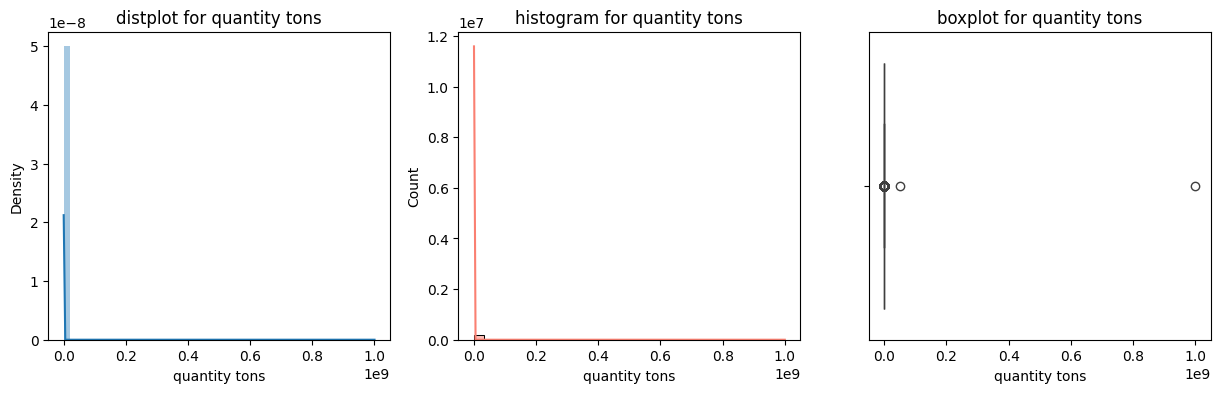

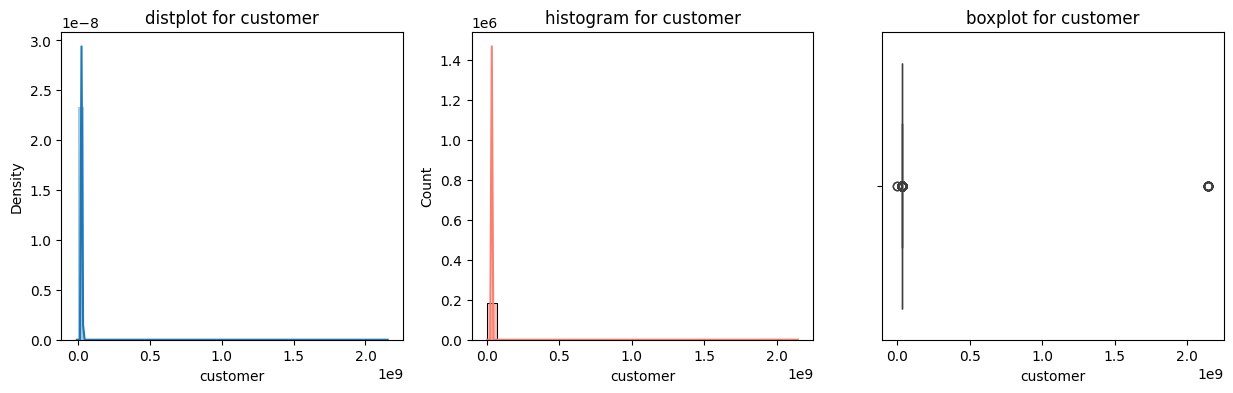

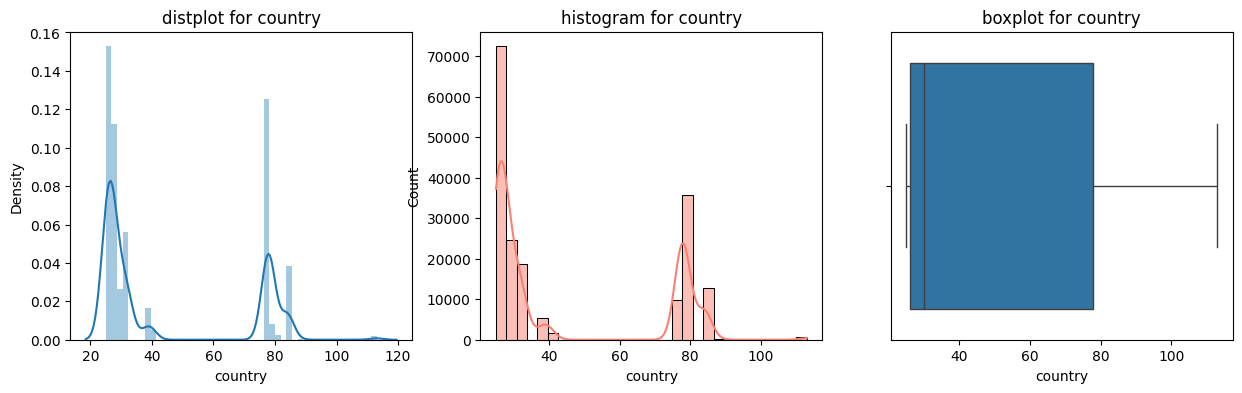

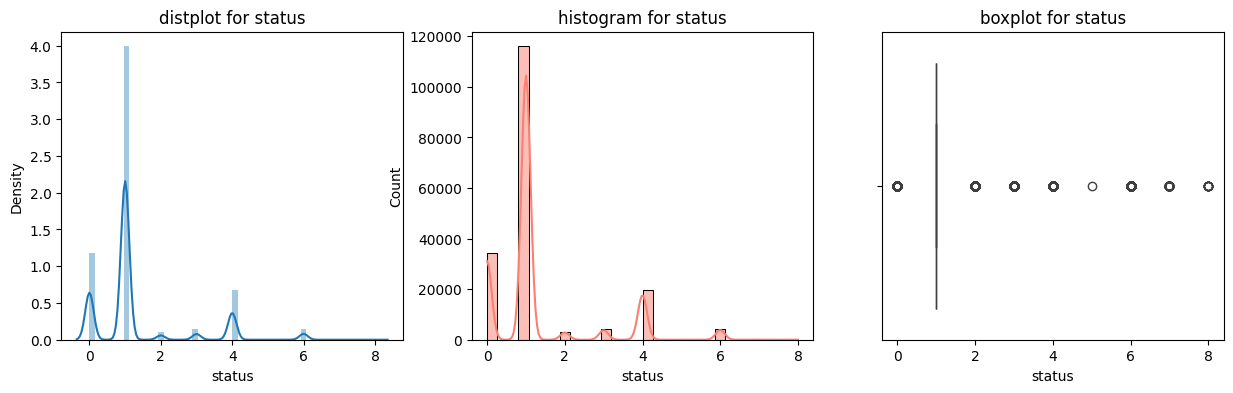

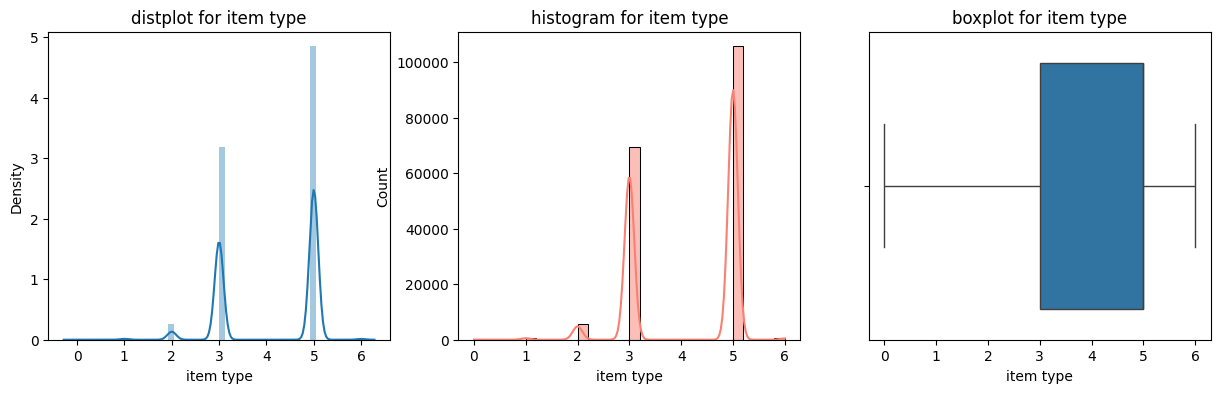

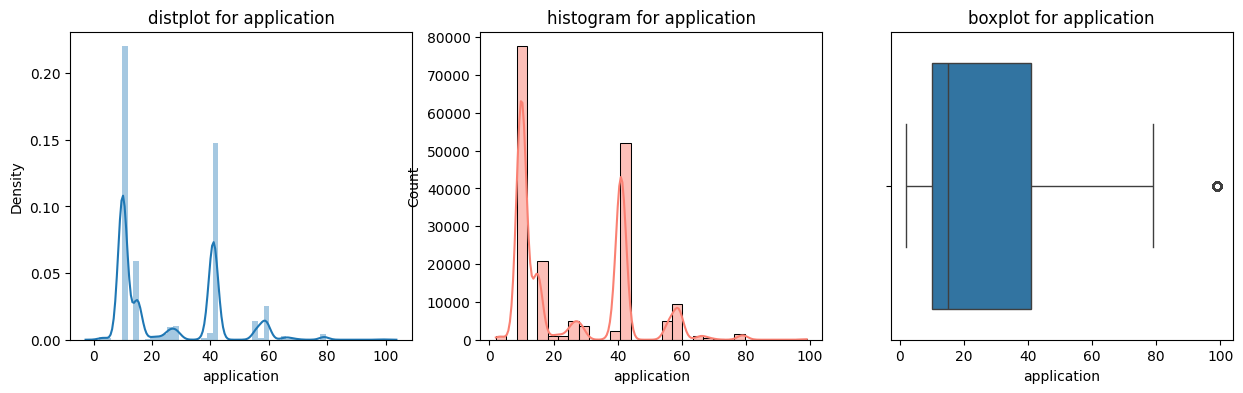

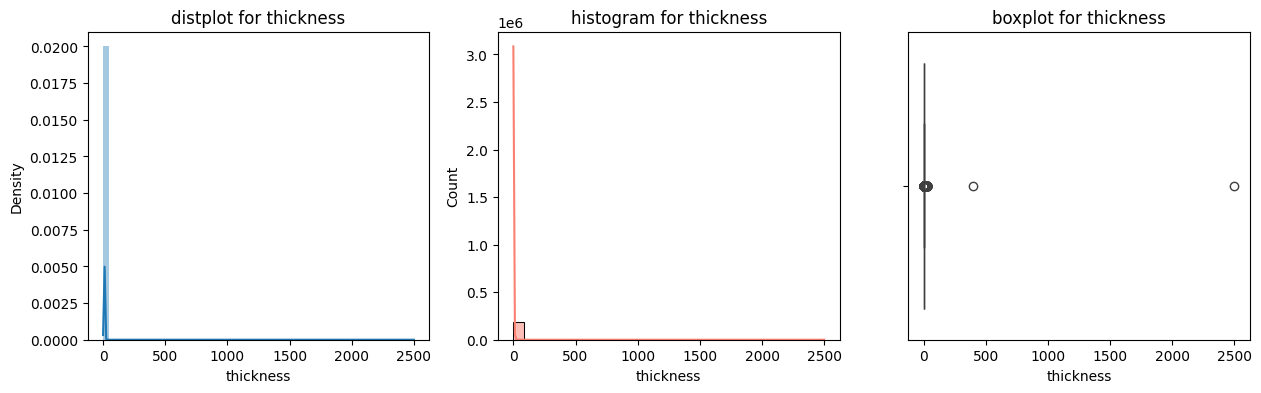

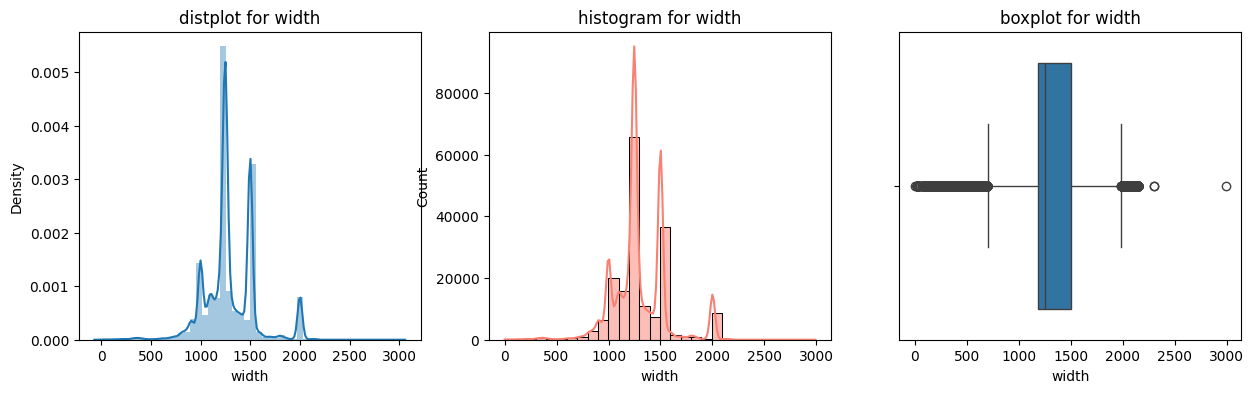

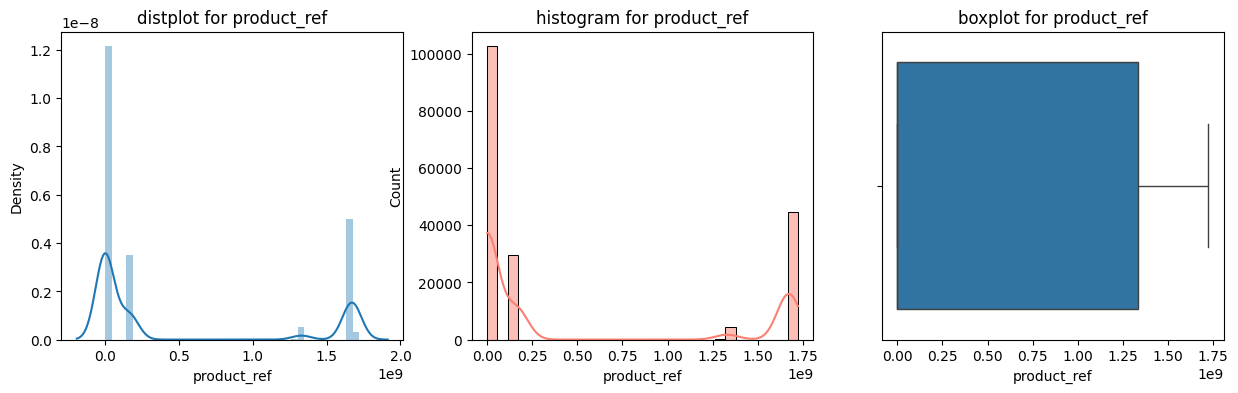

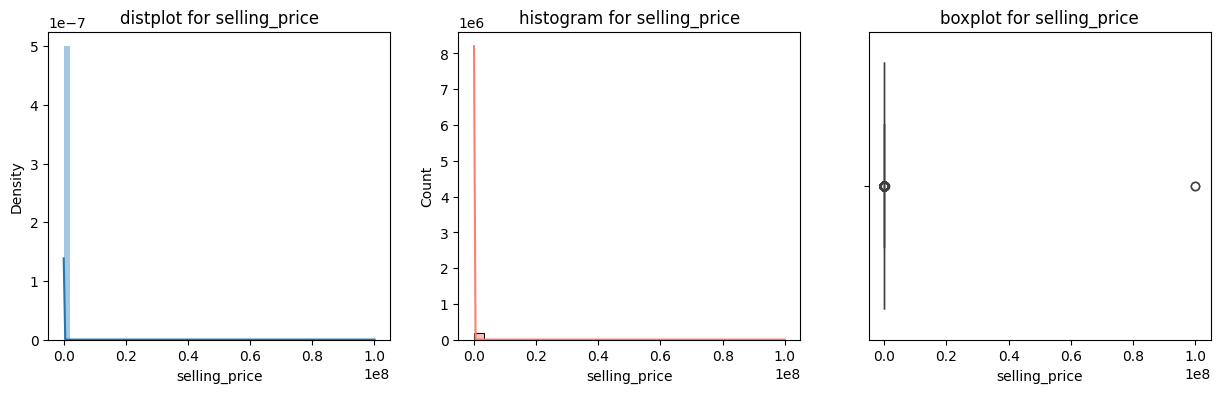

In [35]:
for i in skewed_columns:
    plot(ind_copper,i)

In [36]:
#skewed_columns
#quantity tons
#customer
#thickness
#selling_price

In [37]:
ind_copper_1=ind_copper.copy()

In [38]:
ind_copper_1.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'item_date_1', 'delivery_date_1'],
      dtype='object')

In [39]:
ind_copper_1["quantity_tons_log"]=np.log(ind_copper_1["quantity tons"])
ind_copper_1["customer_log"]=np.log(ind_copper_1["customer"])
ind_copper_1["thickness_log"]=np.log(ind_copper_1["thickness"])
ind_copper_1["selling_price_log"]=np.log(ind_copper_1["selling_price"])




In [40]:
skewed_columns_1=["quantity_tons_log","customer_log","thickness_log","selling_price_log"]

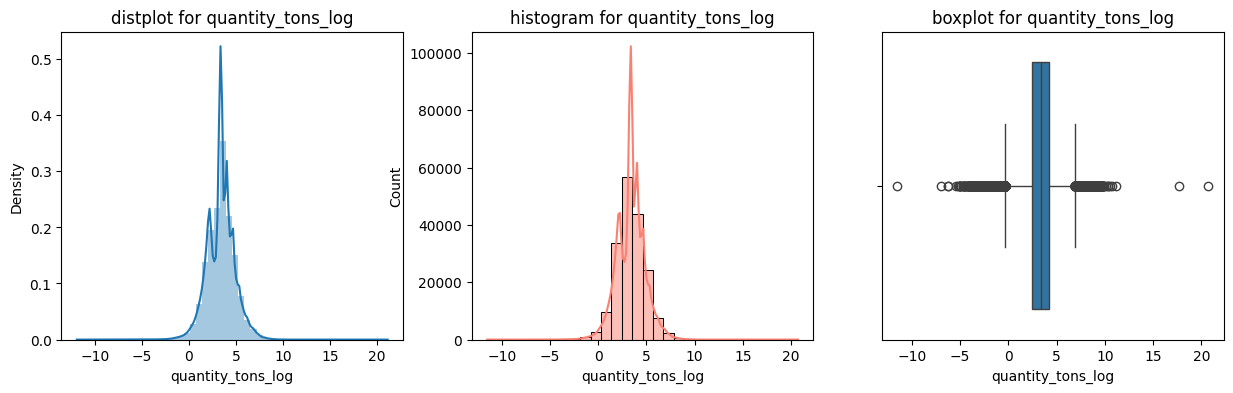

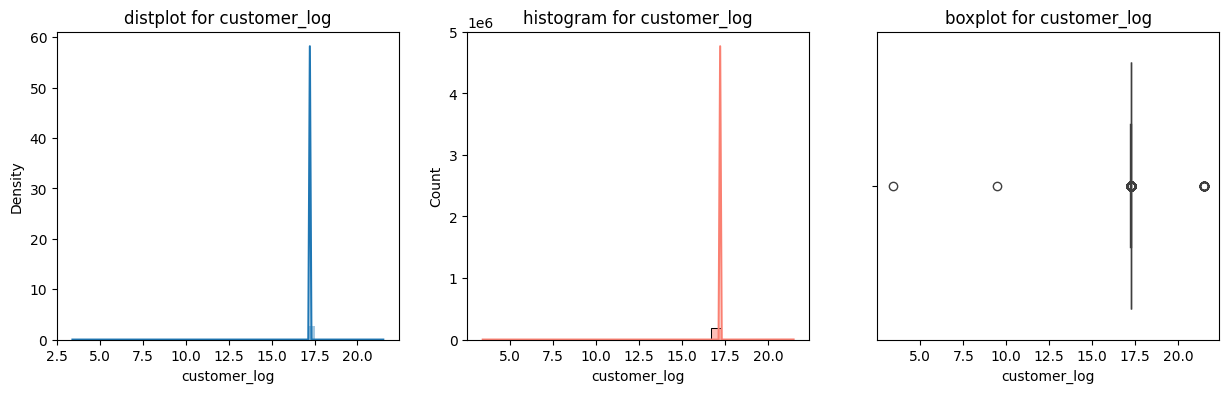

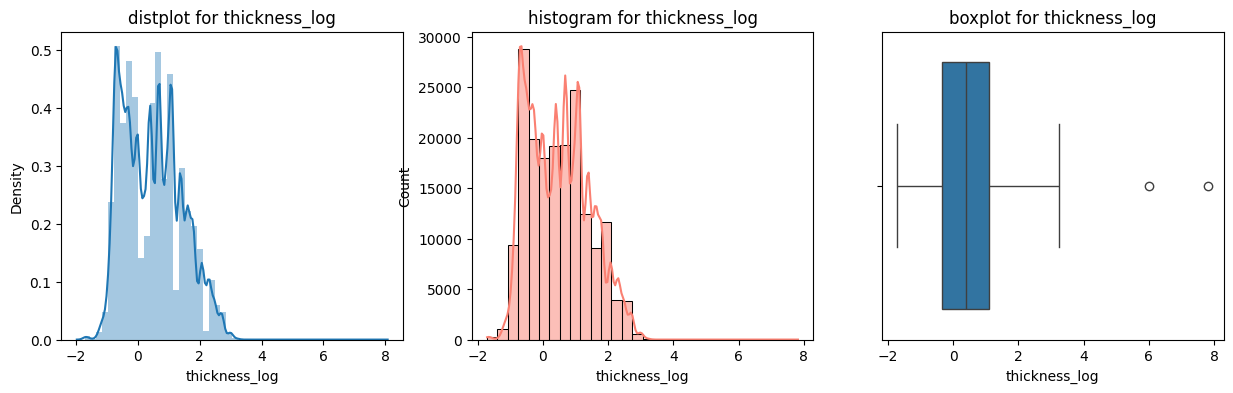

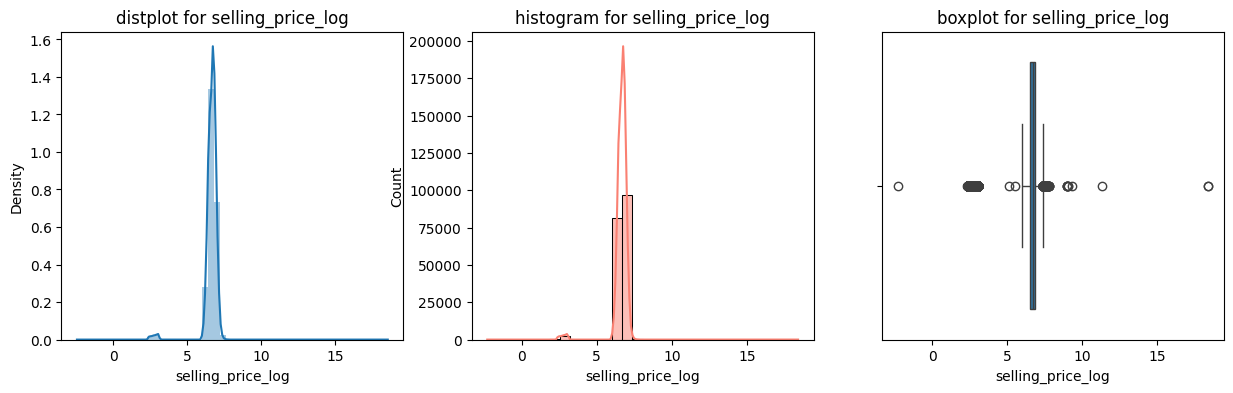

In [41]:
for i in skewed_columns_1:
    plot(ind_copper_1,i)

In [42]:
#outliers handling using (IQR)

In [43]:
ind_copper_2=ind_copper_1.copy()

In [44]:
ind_copper_2.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log
0,20210401.0,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931
1,20210401.0,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684
2,20210401.0,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211
3,20210401.0,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790
4,20210401.0,785.526262,30211560.0,28.0,1,5.0,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842


In [45]:
def outliers(ind_copper,column):
    q1=ind_copper[column].quantile(0.25)
    q3=ind_copper[column].quantile(0.75)

    iqr=q3-q1

    upper_threshold=q3 + (1.5*iqr)
    lower_threshold=q1 - (1.5*iqr)

    ind_copper[column]=ind_copper[column].clip(lower_threshold,upper_threshold)

In [46]:
ind_copper_2.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181673.0,2.020459e+07,4.551114e+03,1.995000e+07,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181673.0,5.874905e+03,2.349075e+06,1.000000e-05,1.097167e+01,3.036501e+01,6.716038e+01,1.000000e+09
customer,181673.0,3.051204e+07,2.433385e+07,3.036501e+01,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489073e+01,2.440303e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,181673.0,1.316684e+00,1.330310e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
item type,181673.0,4.133036e+00,1.055230e+00,0.000000e+00,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
application,181673.0,2.561441e+01,1.775342e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181673.0,2.564822e+00,6.572303e+00,1.800000e-01,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.000000e+00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,6.117280e+05,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09


In [47]:
ind_copper_2.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'item_date_1', 'delivery_date_1',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log'],
      dtype='object')

In [48]:
outlier_columns=['quantity_tons_log', 'customer_log',
                'thickness_log', 'selling_price_log',"width","application"]
for i in outlier_columns:
    outliers(ind_copper_2,i)

In [49]:
ind_copper_2.describe().T

,count,mean,std,min,25%,50%,75%,max
item_date,181673.0,2.020459e+07,4.551114e+03,1.995000e+07,2.020093e+07,2.020113e+07,2.021020e+07,2.021040e+07
quantity tons,181673.0,5.874905e+03,2.349075e+06,1.000000e-05,1.097167e+01,3.036501e+01,6.716038e+01,1.000000e+09
customer,181673.0,3.051204e+07,2.433385e+07,3.036501e+01,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489073e+01,2.440303e+01,2.500000e+01,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,181673.0,1.316684e+00,1.330310e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
item type,181673.0,4.133036e+00,1.055230e+00,0.000000e+00,3.000000e+00,5.000000e+00,5.000000e+00,6.000000e+00
application,181673.0,2.560516e+01,1.771817e+01,2.000000e+00,1.000000e+01,1.500000e+01,4.100000e+01,8.750000e+01
thickness,181673.0,2.564822e+00,6.572303e+00,1.800000e-01,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.297046e+03,2.489619e+02,7.000000e+02,1.180000e+03,1.250000e+03,1.500000e+03,1.980000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,6.117280e+05,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09


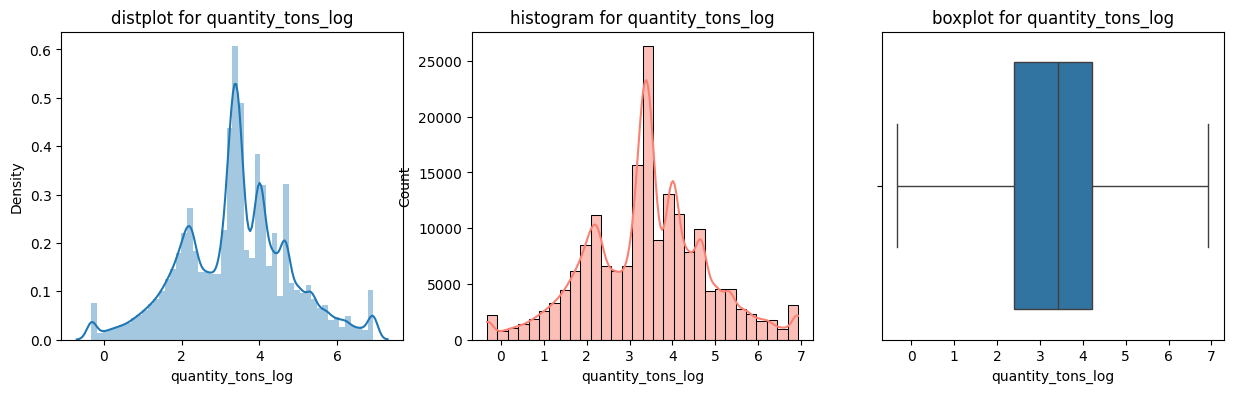

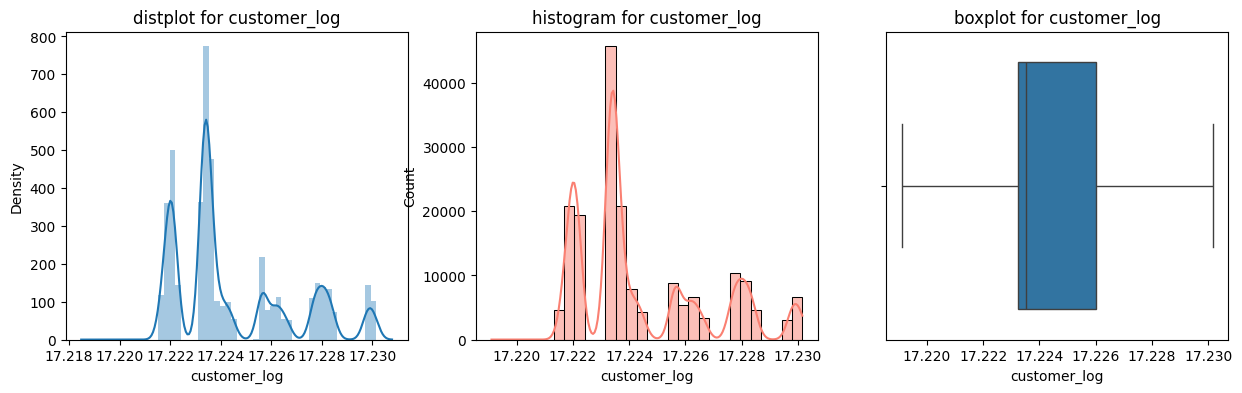

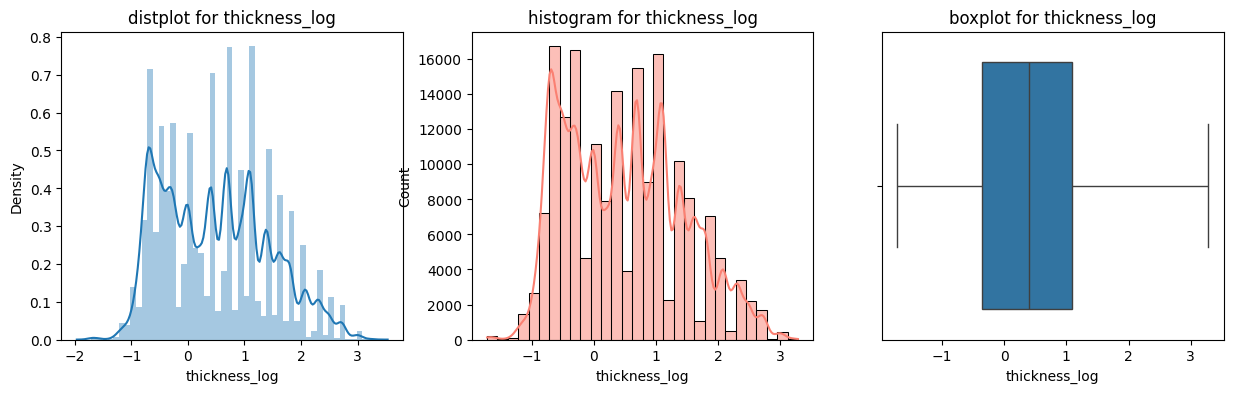

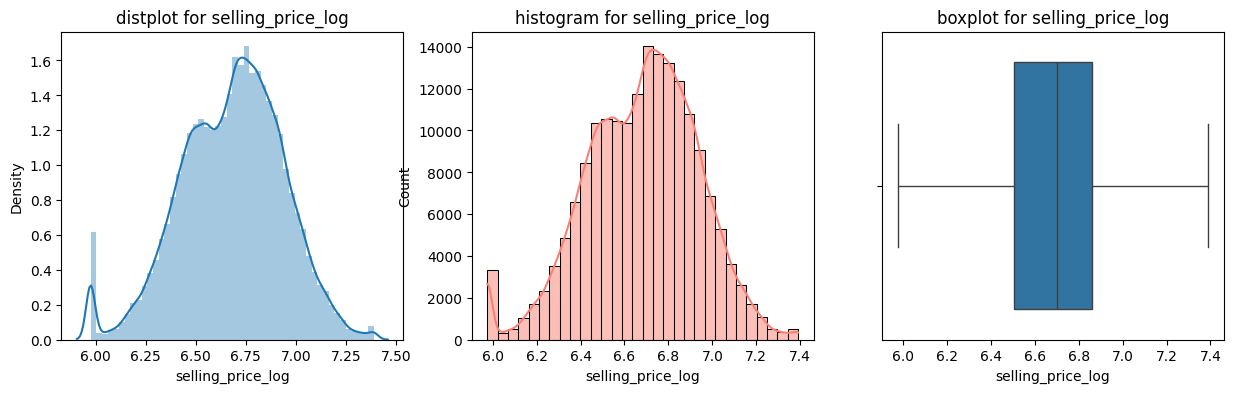

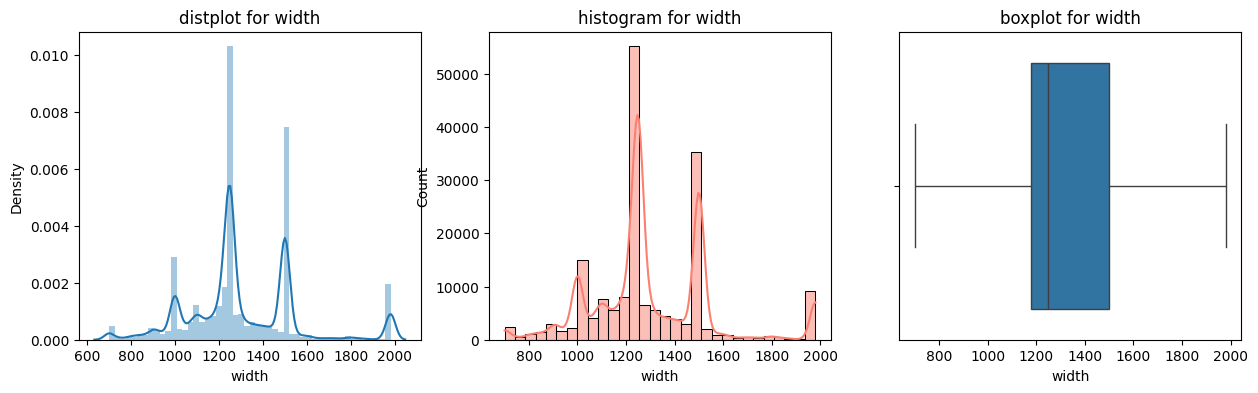

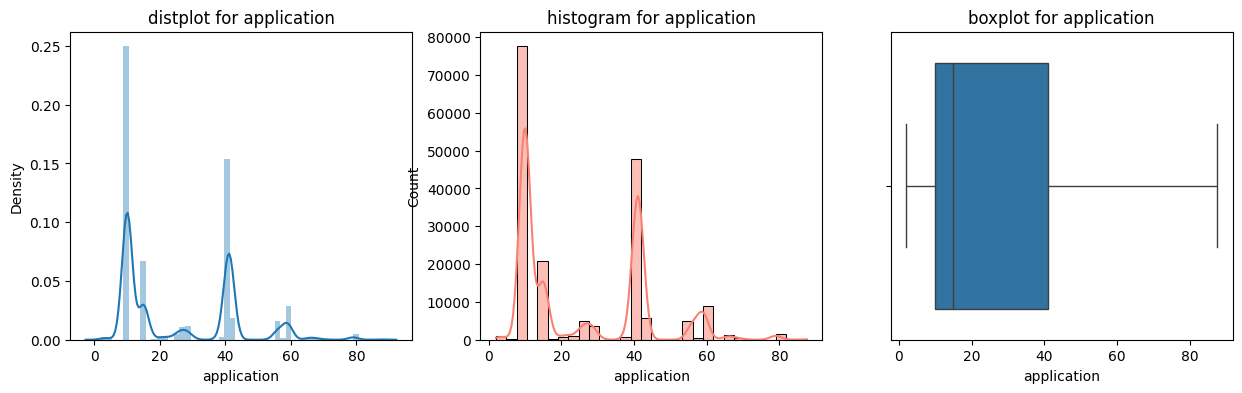

In [50]:
for i in outlier_columns:
    plot(ind_copper_2,i)

In [51]:
#dropped unwanted columns
#quantity tons
#customer
#thickness
#selling_price

ind_copper_2=ind_copper_1.drop(columns=["quantity tons","customer","thickness","selling_price"])

In [52]:
ind_copper_2.head()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684
2,20210401.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211
3,20210401.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790
4,20210401.0,28.0,1,5.0,10.0,2000.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842


In [53]:
#checking the correlation using heatmap

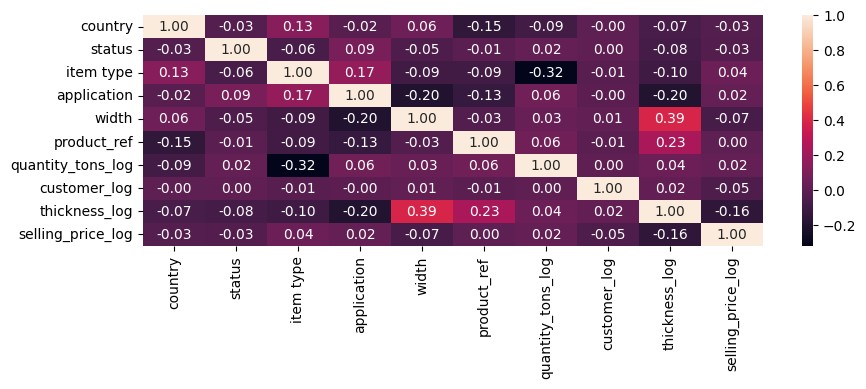

In [54]:
corr=ind_copper_2.drop(columns=["item_date","delivery date","item_date_1","delivery_date_1"]).corr()
plt.figure(figsize=(10,3))
sns.heatmap(corr,annot=True,fmt="0.2f")
plt.show()

In [55]:
# the highest correlations are "0.39","0.23","-0.32","-0.20"

In [56]:
#wrong delivery date handling using ML

In [57]:
ind_copper_3=ind_copper_2.copy()

In [58]:
ind_copper_3.head()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684
2,20210401.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211
3,20210401.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790
4,20210401.0,28.0,1,5.0,10.0,2000.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842


In [59]:
ind_copper_3.dtypes

item_date            float64
country              float64
status                 int64
item type            float64
application          float64
width                float64
product_ref            int64
delivery date        float64
item_date_1           object
delivery_date_1       object
quantity_tons_log    float64
customer_log         float64
thickness_log        float64
selling_price_log    float64
dtype: object

In [60]:
#convert datatypes (object to datetime format)

ind_copper_3["delivery_date_1"]=pd.to_datetime(ind_copper_3["delivery_date_1"])
ind_copper_3["item_date_1"]=pd.to_datetime(ind_copper_3["item_date_1"])

In [61]:
#identify diff of delivery date and item date

ind_copper_3["date_differ"]=(ind_copper_3["delivery_date_1"]-ind_copper_3["item_date_1"]).dt.days

In [62]:
ind_copper_3["date_differ"]

0         91
1          0
2        -90
3        -90
4        -31
          ..
181668    -1
181669    -1
181670    -1
181671    -1
181672    -1
Name: date_differ, Length: 181673, dtype: int64

In [63]:
#some values are negative
#this is not possible

In [64]:
ind_copper_3["item_date_day"]=ind_copper_3["item_date_1"].dt.day
ind_copper_3["item_date_month"]=ind_copper_3["item_date_1"].dt.month
ind_copper_3["item_date_year"]=ind_copper_3["item_date_1"].dt.year

In [65]:
ind_copper_3.head()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931,91,1,4,2021
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684,0,1,4,2021
2,20210401.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211,-90,1,4,2021
3,20210401.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790,-90,1,4,2021
4,20210401.0,28.0,1,5.0,10.0,2000.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842,-31,1,4,2021


In [66]:
#separate positive date differ

ind_copper_3_positive=ind_copper_3[ind_copper_3["date_differ"]>=0]
ind_copper_3_positive.reset_index(drop=True, inplace=True)

In [67]:
ind_copper_3_positive.tail()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year
165560,20200702.0,25.0,0,3.0,15.0,2000.0,640665,20200801.0,2020-07-02,2020-08-01,3.472467,17.224270,1.791759,6.313548,30,2,7,2020
165561,20200702.0,30.0,0,3.0,10.0,1525.0,640665,20200801.0,2020-07-02,2020-08-01,4.196171,17.222079,1.348073,6.126869,30,2,7,2020
165562,20200702.0,30.0,0,3.0,10.0,1525.0,640665,20200801.0,2020-07-02,2020-08-01,4.156686,17.222079,1.766442,6.124683,30,2,7,2020
165563,20200702.0,30.0,0,3.0,10.0,1500.0,640665,20200801.0,2020-07-02,2020-08-01,4.025862,17.222079,2.060514,6.126869,30,2,7,2020
165564,20200702.0,30.0,0,3.0,10.0,1830.0,640665,20200801.0,2020-07-02,2020-08-01,5.328963,17.222079,1.348073,6.131226,30,2,7,2020


In [68]:
#separate negative date differ

ind_copper_3_negative=ind_copper_3[ind_copper_3["date_differ"]<=0]
ind_copper_3_negative.reset_index(drop=True, inplace=True)

In [69]:
ind_copper_3_negative.tail()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year
16563,20200702.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,17.223381,-0.040822,6.381816,-1,2,7,2020
16564,20200702.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,17.223381,-0.051293,6.378426,-1,2,7,2020
16565,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,17.223381,-0.342490,6.428105,-1,2,7,2020
16566,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,3.413291,17.223381,-0.162519,6.398595,-1,2,7,2020
16567,20200702.0,25.0,1,5.0,41.0,1240.0,164141591,20200701.0,2020-07-02,2020-07-01,6.008043,17.223381,-0.342490,6.408529,-1,2,7,2020


In [70]:
#now we want to create model for delivery date prediction
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [71]:
ind_copper_3_positive.columns

Index(['item_date', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 'delivery date', 'item_date_1', 'delivery_date_1',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log', 'date_differ', 'item_date_day', 'item_date_month',
       'item_date_year'],
      dtype='object')

In [72]:
#Find the best algorithm for delivery date prediction

In [73]:
def date_prediction(ind_copper,algorithm):
    x=ind_copper.drop(columns=["item_date_1","delivery_date_1","date_differ"])
    y=ind_copper["date_differ"]

    #Train-Test splitting
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    #Train model
    model=algorithm().fit(x_train,y_train)

    #prediction
    y_pred=model.predict(x_test)

    #performance evaluation
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    mae=mean_absolute_error(y_test,y_pred)
    r2=r2_score(y_test,y_pred)

    metrics={"R2_score":r2,
             "Mean_squared_error":mse,
             "Root_mean_squared_error":rmse,
             "Mean_absolute_error":mae}
    return metrics



In [74]:
print(date_prediction(ind_copper_3_positive, DecisionTreeRegressor))
print(date_prediction(ind_copper_3_positive, RandomForestRegressor))
print(date_prediction(ind_copper_3_positive, ExtraTreesRegressor))
print(date_prediction(ind_copper_3_positive, GradientBoostingRegressor))
print(date_prediction(ind_copper_3_positive, AdaBoostRegressor))
print(date_prediction(ind_copper_3_positive, XGBRegressor))

{'R2_score': 0.9972584019790193, 'Mean_squared_error': 4.253556005194334, 'Root_mean_squared_error': 2.062415090420533, 'Mean_absolute_error': 0.015703802132093134}
{'R2_score': 0.997204364071406, 'Mean_squared_error': 4.337395162020957, 'Root_mean_squared_error': 2.0826413906433716, 'Mean_absolute_error': 0.01689366713979405}
{'R2_score': 0.9992756185536136, 'Mean_squared_error': 1.123869009150485, 'Root_mean_squared_error': 1.0601268835146505, 'Mean_absolute_error': 0.01694953643584093}
{'R2_score': 0.9878301249859647, 'Mean_squared_error': 18.88141315840947, 'Root_mean_squared_error': 4.345274808157646, 'Mean_absolute_error': 2.9480825402266215}
{'R2_score': 0.7426637329352681, 'Mean_squared_error': 399.2540904067077, 'Root_mean_squared_error': 19.981343558597548, 'Mean_absolute_error': 16.772821287414086}
{'R2_score': 0.9990268340307871, 'Mean_squared_error': 1.5098551723187397, 'Root_mean_squared_error': 1.2287616417836047, 'Mean_absolute_error': 0.19897356529877377}


In [75]:
def RandomForest(train_ind_copper,test_ind_copper):
    x=train_ind_copper.drop(columns=["item_date_1","delivery_date_1","date_differ"])
    y=train_ind_copper["date_differ"]

    #train test splitting
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
    model=RandomForestRegressor().fit(x_train,y_train)

    data=test_ind_copper.drop(columns=["item_date_1","delivery_date_1","date_differ"])
    y_pred=model.predict(data)
    return y_pred

In [76]:
date_difference=RandomForest(ind_copper_3_positive,ind_copper_3_negative)

In [77]:
date_difference

array([ 0.  , 16.54, 16.54, ..., 30.  , 30.  , 30.  ])

In [78]:
#changing data_differ datatypes float into int
date_difference_1=[]
for i in date_difference:
    dd=int(round(i,0))
    date_difference_1.append(dd)

In [79]:
ind_copper_3_negative["date_differ"]=pd.DataFrame(date_difference_1)

In [80]:
ind_copper_3_negative.isnull().sum()

item_date            0
country              0
status               0
item type            0
application          0
width                0
product_ref          0
delivery date        0
item_date_1          0
delivery_date_1      0
quantity_tons_log    0
customer_log         0
thickness_log        0
selling_price_log    0
date_differ          0
item_date_day        0
item_date_month      0
item_date_year       0
dtype: int64

In [81]:
#find delivery date using item_date and date_differ

In [82]:
def find_delivery_date(item_date,date_differ):
    date=item_date + pd.to_timedelta(date_differ,unit="D")
    return date

In [83]:
ind_copper_3_negative["delivery_date_1"]=find_delivery_date(ind_copper_3_negative["item_date_1"],ind_copper_3_negative["date_differ"])

In [84]:
#concatenate two dataframes

ind_copper_final=pd.concat([ind_copper_3_positive,ind_copper_3_negative],axis=0,ignore_index=True)

In [85]:
ind_copper_final.tail()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year
182128,20200702.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-08-01,4.629691,17.223381,-0.040822,6.381816,30,2,7,2020
182129,20200702.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-08-01,5.337954,17.223381,-0.051293,6.378426,30,2,7,2020
182130,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,1.443523,17.223381,-0.342490,6.428105,30,2,7,2020
182131,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,3.413291,17.223381,-0.162519,6.398595,30,2,7,2020
182132,20200702.0,25.0,1,5.0,41.0,1240.0,164141591,20200701.0,2020-07-02,2020-08-01,6.008043,17.223381,-0.342490,6.408529,30,2,7,2020


In [86]:
ind_copper_final["delivery date_day"]=ind_copper_final["delivery_date_1"].dt.day
ind_copper_final["delivery_date_month"]=ind_copper_final["delivery_date_1"].dt.month
ind_copper_final["delivery_date_year"]=ind_copper_final["delivery_date_1"].dt.year

In [87]:
ind_copper_final.head(2)

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year,delivery date_day,delivery_date_month,delivery_date_year
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931,91,1,4,2021,1,7,2021
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684,0,1,4,2021,1,4,2021


In [88]:
ind_copper_final.drop(columns=["item_date","delivery date","item_date_1","delivery_date_1","date_differ"],inplace=True)

In [89]:
ind_copper_final.columns

Index(['country', 'status', 'item type', 'application', 'width', 'product_ref',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log', 'item_date_day', 'item_date_month',
       'item_date_year', 'delivery date_day', 'delivery_date_month',
       'delivery_date_year'],
      dtype='object')

In [90]:
#saving the csv
ind_copper_final.to_csv("S:/Copper Analysis/Industrial_Copper_Colab.csv",index=False)

In [91]:
#read the csv
ind_copper_final=pd.read_csv("S:/Copper Analysis/Industrial_Copper_Colab.csv")

In [92]:
#Classification method-predict(LOSS OR WIN)

In [93]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,auc,roc_curve,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from imblearn.combine import SMOTETomek
import pickle


In [94]:
ind_copper_class=ind_copper_final.copy()

In [95]:
#filter a status column like won and loss
ind_copper_c=ind_copper_class[(ind_copper_class["status"]==1) | (ind_copper_class["status"]==0)]

In [96]:
ind_copper_c.tail()

,country,status,item type,application,width,product_ref,quantity_tons_log,customer_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery date_day,delivery_date_month,delivery_date_year
182128,25.0,1,5.0,41.0,1220.0,164141591,4.629691,17.223381,-0.040822,6.381816,2,7,2020,1,8,2020
182129,25.0,1,5.0,41.0,1500.0,164141591,5.337954,17.223381,-0.051293,6.378426,2,7,2020,1,8,2020
182130,25.0,1,5.0,41.0,1250.0,164141591,1.443523,17.223381,-0.342490,6.428105,2,7,2020,1,8,2020
182131,25.0,1,5.0,41.0,1250.0,164141591,3.413291,17.223381,-0.162519,6.398595,2,7,2020,1,8,2020
182132,25.0,1,5.0,41.0,1240.0,164141591,6.008043,17.223381,-0.342490,6.408529,2,7,2020,1,8,2020


In [97]:
ind_copper_c["status"].value_counts()

status
1    116409
0     34460
Name: count, dtype: int64

In [98]:
#this is imbalanced data

In [99]:
x=ind_copper_c.drop(columns=["status"],axis=1)
y=ind_copper_c["status"]


In [100]:
x.shape,y.shape

((150869, 15), (150869,))

In [101]:
x_new,y_new=SMOTETomek().fit_resample(x,y)

In [102]:
x_new.shape,y_new.shape

((230986, 15), (230986,))

In [103]:
y_new.value_counts()

status
1    115493
0    115493
Name: count, dtype: int64

In [104]:
#find the best algorithm for classification prediction
def accuracy_checking(x_data, y_data, algorithm):
  #train test splitting
  x_train, x_test, y_train, y_test= train_test_split(x_data, y_data, test_size= 0.2, random_state=42)

  model= algorithm().fit(x_train, y_train)

  y_pred_train= model.predict(x_train)
  y_pred_test= model.predict(x_test)

  #checking the accuracy_score
  accuracy_train= accuracy_score(y_train, y_pred_train)
  accuracy_test= accuracy_score(y_test, y_pred_test)

  metrics={"Algorithm": algorithm.__name__,
           "Accuracy_Train": accuracy_train,
           "Accuracy_Test": accuracy_test}
  return metrics

In [105]:
print(accuracy_checking(x,y,DecisionTreeClassifier))
print(accuracy_checking(x,y,RandomForestClassifier))
print(accuracy_checking(x,y,ExtraTreesClassifier))
print(accuracy_checking(x,y,AdaBoostClassifier))
print(accuracy_checking(x,y,GradientBoostingClassifier))
print(accuracy_checking(x,y,XGBClassifier))

{'Algorithm': 'DecisionTreeClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9496586465168688}
{'Algorithm': 'RandomForestClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9685490819911182}
{'Algorithm': 'ExtraTreesClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.974845893815868}
{'Algorithm': 'AdaBoostClassifier', 'Accuracy_Train': 0.8139359542648825, 'Accuracy_Test': 0.8126532776562604}
{'Algorithm': 'GradientBoostingClassifier', 'Accuracy_Train': 0.8360661170719582, 'Accuracy_Test': 0.8347584012726188}
{'Algorithm': 'XGBClassifier', 'Accuracy_Train': 0.9461452421392766, 'Accuracy_Test': 0.9349108504010075}


In [106]:
print(accuracy_checking(x_new,y_new,DecisionTreeClassifier))
print(accuracy_checking(x_new,y_new,RandomForestClassifier))
print(accuracy_checking(x_new,y_new,ExtraTreesClassifier))
print(accuracy_checking(x_new,y_new,AdaBoostClassifier))
print(accuracy_checking(x_new,y_new,GradientBoostingClassifier))
print(accuracy_checking(x_new,y_new,XGBClassifier))

{'Algorithm': 'DecisionTreeClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9638728949305164}
{'Algorithm': 'RandomForestClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9823801896185982}
{'Algorithm': 'ExtraTreesClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9853889778778302}
{'Algorithm': 'AdaBoostClassifier', 'Accuracy_Train': 0.7794174946425092, 'Accuracy_Test': 0.7789514697605957}
{'Algorithm': 'GradientBoostingClassifier', 'Accuracy_Train': 0.8191765699071368, 'Accuracy_Test': 0.8198623317026711}
{'Algorithm': 'XGBClassifier', 'Accuracy_Train': 0.9551973071844492, 'Accuracy_Test': 0.9483527425429672}


In [107]:
#get the highest accuracy using hyperparameter using RandomsearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

x, y = make_classification(n_samples=10000, n_features=20, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size=0.2, random_state=42)
parameters= {"max_depth": [5, 10],
             "min_samples_split": [2,5],
             "min_samples_leaf": [1, 2],
             "max_features": ['sqrt', 'log2', None]}

random_search=RandomizedSearchCV(estimator=RandomForestClassifier(),
                                 param_distributions=parameters,
                                 n_iter=10,
                                 cv=3,
                                 random_state=42,
                                 n_jobs=-1)
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5]},
                   random_state=42)

In [108]:
random_search.cv_results_

{'mean_fit_time': array([73.36368513, 31.43075395, 19.03917845, 30.56987866, 71.40096903,
        71.11554535, 29.49082685, 17.90665642, 81.27923203, 17.27856199]),
 'std_fit_time': array([0.30123836, 0.39277631, 0.44325647, 0.27136027, 0.29031192,
        0.88184204, 0.87527934, 0.5595362 , 0.1143606 , 0.40555533]),
 'mean_score_time': array([0.52513011, 1.26024612, 0.56244636, 1.00316652, 0.54255446,
        0.57547537, 1.01686001, 0.5302914 , 0.65195775, 0.42947435]),
 'std_score_time': array([0.01596223, 0.01413783, 0.0180882 , 0.00351846, 0.01299191,
        0.03442224, 0.02281225, 0.02286252, 0.01854772, 0.06505144]),
 'param_min_samples_split': masked_array(data=[2, 2, 2, 2, 5, 5, 5, 5, 5, 5],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[1, 1, 1, 2, 2, 1, 1, 1, 1, 1],
              mask=[False, False, False, False, Fa

In [109]:
random_search.best_score_

0.8802736108405308

In [110]:
random_search.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 10}

In [111]:
#passing the best hypertuning
#check the accuracy for training and testing

In [112]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.2,random_state=42)

model=RandomForestClassifier(max_depth=20,max_features=None,min_samples_leaf=1,min_samples_split=2).fit(x_train,y_train)

y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)

#train the accuracy_score for train and test
accuracy_train=accuracy_score(y_train,y_pred_train)
accuracy_test=accuracy_score(y_test,y_pred_test)

print("Accuracy score for Train and Test")
print("---------------------------------")
print("Accuracy_Train: ",accuracy_train)
print("Accuracy_test: ",accuracy_test)
print(" ")

#confusion matrix for Test

print("Confusion_matrix for Test")
print("-------------------------")
print(confusion_matrix(y_true=y_test,y_pred=y_pred_test))
print(" ")
print("Classification_report for Test")
print("------------------------------")
print(classification_report(y_true=y_test,y_pred=y_pred_test))

Accuracy score for Train and Test
---------------------------------
Accuracy_Train:  0.9873638980886205
Accuracy_test:  0.9715572102688428
 
Confusion_matrix for Test
-------------------------
[[22848   341]
 [  973 22036]]
 
Classification_report for Test
------------------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     23189
           1       0.98      0.96      0.97     23009

    accuracy                           0.97     46198
   macro avg       0.97      0.97      0.97     46198
weighted avg       0.97      0.97      0.97     46198



In [113]:
#now the training accuracy overfitting reduced.so now model will predict effectively for unseen data.
# Receiver Operating Characteristics(ROC) curve and Area Under the Curve(AUC)

FP,TP,threshold=roc_curve(y_true=y_test,y_score=y_pred_test)
print(threshold)
print(FP)
print(TP)
print(" ")
auc_curve=auc(x=FP,y=TP)
print("auc_curve",auc_curve)

[inf  1.  0.]
[0.         0.01470525 1.        ]
[0.        0.9577122 1.       ]
 
auc_curve 0.9715034756980322


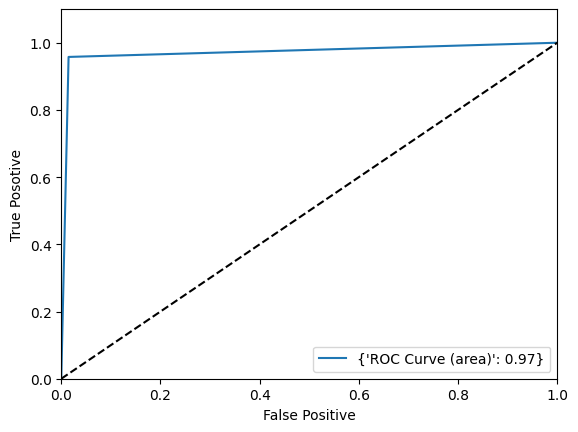

In [114]:
#create a plot for roc and auc curve
roc_point={"ROC Curve (area)":round(auc_curve,2)}
plt.plot(FP,TP,label=roc_point)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.1])
plt.xlabel("False Positive")
plt.ylabel("True Posotive")
plt.plot([0,1],[0,1],"k--")
plt.legend(loc="lower right")
plt.show()

In [115]:
user_data=np.array([[30153963, 30, 6, 28, 952, 628377, 5.9, -0.96, 6.46, 1, 4, 2021, 1, 1, 2021]])
y_pred_user= model.predict(user_data)
if y_pred_user == 1:
    print("Won")
else:
    print("Lose")

Won


In [116]:
#save the model using the pickle

with open("Classification_model.pkl","wb") as f:
    pickle.dump(model,f)

In [117]:
with open("S:/Copper Analysis/.venv/Classification_model.pkl","rb") as f1:
    class_model=pickle.load(f1)

In [118]:
user_data=np.array([[77.0,3.0,10.0,1500.0,16414,3.677655,17.222226,0.000000,7.110696,1,4,2021,1,8,2021]])
y_pred_user= model.predict(user_data)
if y_pred_user == 1:
    print("Won")
else:
    print("Lose")

Lose


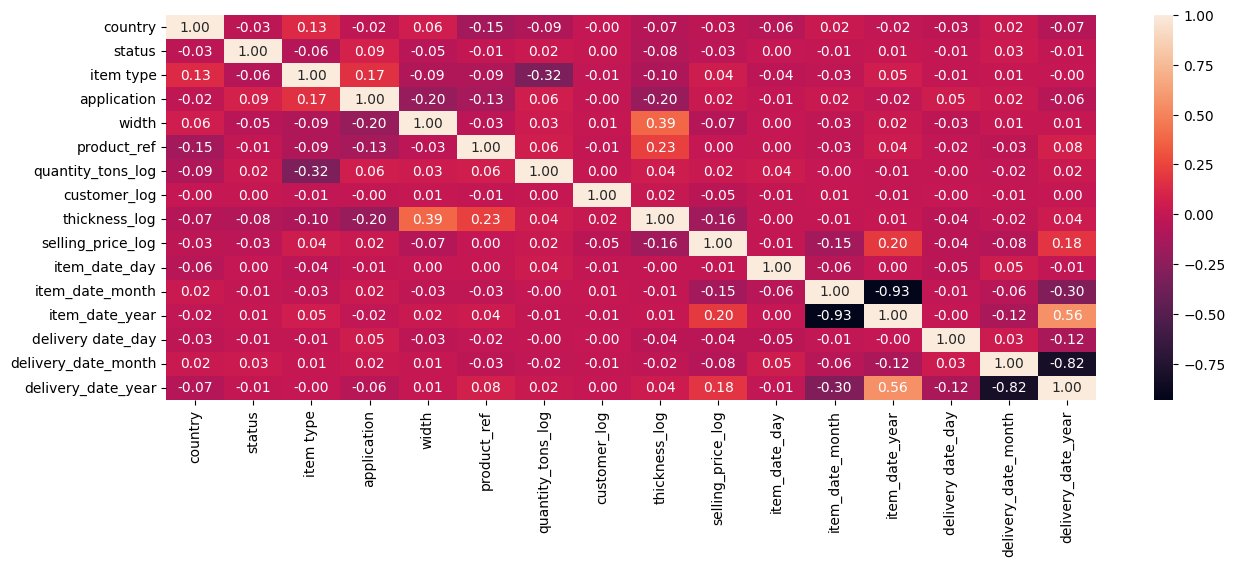

In [119]:
corr=ind_copper_final.corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr,annot=True,fmt="0.2f")
plt.show()

In [120]:
#Regression method-Predict the Selling Price

In [121]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor


In [122]:
ind_copper_reg=ind_copper_final.copy()

In [123]:
#Find the best ML model to predict the selling price

In [126]:
def accuracy_regressor(ind_copper,algorithm):
    x=ind_copper.drop(columns=["selling_price_log"],axis=1)
    y=ind_copper["selling_price_log"]

    #train-test-split
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
    model=algorithm().fit(x_train,y_train)

    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)

    r2_train=r2_score(y_train,y_pred_train)
    r2_test=r2_score(y_test,y_pred_test)

    metrics={"Algorithm":algorithm.__name__,
             "R2_Train":r2_train,
             "R2_Test":r2_test}
    return metrics

In [127]:
print(accuracy_regressor(ind_copper_reg,DecisionTreeRegressor))
print(accuracy_regressor(ind_copper_reg,RandomForestRegressor))
print(accuracy_regressor(ind_copper_reg,ExtraTreesRegressor))
print(accuracy_regressor(ind_copper_reg,AdaBoostRegressor))
print(accuracy_regressor(ind_copper_reg,GradientBoostingRegressor))
print(accuracy_regressor(ind_copper_reg,XGBRegressor))

{'Algorithm': 'DecisionTreeRegressor', 'R2_Train': 1.0, 'R2_Test': 0.9673223913885618}
{'Algorithm': 'RandomForestRegressor', 'R2_Train': 0.9975192091595035, 'R2_Test': 0.9751989727967383}
{'Algorithm': 'ExtraTreesRegressor', 'R2_Train': 1.0, 'R2_Test': 0.9683637299733021}
{'Algorithm': 'AdaBoostRegressor', 'R2_Train': 0.5802799790204549, 'R2_Test': 0.570174601057388}
{'Algorithm': 'GradientBoostingRegressor', 'R2_Train': 0.9702225237583469, 'R2_Test': 0.9594084372916664}
{'Algorithm': 'XGBRegressor', 'R2_Train': 0.9864604994062596, 'R2_Test': 0.9721512170304591}


In [128]:
x=ind_copper_reg.drop(columns=["selling_price_log"],axis=1)
y=ind_copper_reg["selling_price_log"]
x, y = make_classification(n_samples=10000, n_features=20, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
parameters_reg= {"max_depth": [5, 10],
             "min_samples_split": [2,5],
             "min_samples_leaf": [1, 2],
             "max_features": ['sqrt', None]}

random_search_reg=RandomizedSearchCV(estimator=RandomForestClassifier(),
                                 param_distributions=parameters_reg,
                                 n_iter=10,
                                 cv=3,
                                 random_state=42,
                                 n_jobs=-1)
random_search_reg.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10],
                                        'max_features': ['sqrt', None],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5]},
                   random_state=42)

In [130]:
random_search_reg.cv_results_

{'mean_fit_time': array([ 1.60282167,  1.61319049,  9.2404565 , 16.74013408, 17.00594616,
         3.90178792,  3.80521297,  3.94249455,  2.34928664, 10.44309529]),
 'std_fit_time': array([0.02165185, 0.02698512, 0.34218733, 0.09950409, 0.39699049,
        0.0258287 , 0.12043737, 0.08552772, 0.05051716, 0.29256885]),
 'mean_score_time': array([0.01983293, 0.02109575, 0.02719585, 0.04114024, 0.03995522,
        0.04439481, 0.03992796, 0.04053577, 0.02460686, 0.02078708]),
 'std_score_time': array([0.00218546, 0.00165759, 0.00071177, 0.00490965, 0.00659018,
        0.00737633, 0.00437811, 0.0037267 , 0.00224652, 0.00116797]),
 'param_min_samples_split': masked_array(data=[2, 5, 5, 2, 5, 5, 2, 5, 2, 5],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[1, 1, 1, 2, 1, 2, 1, 1, 2, 2],
              mask=[False, False, False, False, Fa

In [129]:
random_search_reg.best_score_

0.9373756543747861

In [131]:
random_search_reg.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': None,
 'max_depth': 10}

In [ ]:
#pass the parameters and check the accuracy for both taining and testing and overfitting

In [132]:
x=ind_copper_reg.drop(columns=["selling_price_log"],axis=1)
y=ind_copper_reg["selling_price_log"]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)
model_reg=RandomForestRegressor(max_depth=20,
                                max_features=None,
                                min_samples_leaf=1,
                                min_samples_split=2).fit(x_train,y_train)
y_pred_train=model_reg.predict(x_train)
y_pred_test=model_reg.predict(x_test)

r2_train=r2_score(y_train,y_pred_train)
r2_test=r2_score(y_test,y_pred_test)
r2_train,r2_test



(0.9957255946453901, 0.975289343784034)

In [ ]:
#predict the selling price with hypertuning

In [133]:
x=ind_copper_reg.drop(columns=["selling_price_log"],axis=1)
y=ind_copper_reg["selling_price_log"]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

model_reg=RandomForestRegressor(max_depth=20,
                                max_features=None,
                                min_samples_leaf=1,
                                min_samples_split=2).fit(x_train,y_train)
y_pred=model_reg.predict(x_test)

mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)

metrics_reg={"R2": r2,
           "Mean Absolute Error": mae,
           "Mean Squared Error": mse,
           "Root Mean Squared Error":rmse}
metrics_reg


{'R2': 0.975263696014684,
 'Mean Absolute Error': 0.03526831874098233,
 'Mean Squared Error': 0.008008049224576548,
 'Root Mean Squared Error': 0.08948770432063026}

In [134]:
user_data=np.array([[30202938,25,1,5,41,1210,1668701718,6.6,-0.2,1,4,2021,1,4,2021]])
y_pred=model_reg.predict(user_data)
print("Predicted selling price with log:",y_pred[0])
print("Predicted selling price without log:",np.exp(y_pred[0]))


Predicted selling price with log: 7.202360354101583
Predicted selling price without log: 1342.5960293965124


In [135]:
import pickle 
with open("Regression_model.pkl","wb") as r:
    pickle.dump(model_reg,r)

In [136]:
with open("S:/Copper Analysis/.venv/Regression_model.pkl","rb") as r1:
    reg_model=pickle.load(r1)

In [137]:
ind_copper_final.head()

,country,status,item type,application,width,product_ref,quantity_tons_log,customer_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery date_day,delivery_date_month,delivery_date_year
0,28.0,1,5.0,10.0,1500.0,1670798778,3.991779,17.221905,0.693147,6.749931,1,4,2021,1,7,2021
1,25.0,1,5.0,41.0,1210.0,1668701718,6.643822,17.223450,-0.223144,6.953684,1,4,2021,1,4,2021
2,25.0,1,5.0,41.0,1265.0,1668701718,5.419608,17.223450,0.405465,6.890609,1,4,2021,1,4,2021
3,30.0,2,5.0,41.0,1125.0,611993,1.259203,17.223667,-0.967584,2.890372,1,4,2021,1,7,2021
4,38.0,1,3.0,10.0,1275.0,1668701376,4.235147,17.228025,-0.510826,7.217443,1,4,2021,1,7,2021


In [138]:
user_data=np.array([[28.0,1,5.0,10.0,1500.0,1670798778,3.991779,17.221905,0.693147,1,4,2021,1,7,2021]])
y_pred=reg_model.predict(user_data)
print("Predicted selling price with log:",y_pred[0])
print("Predicted selling price without log:",np.exp(y_pred[0]))


Predicted selling price with log: 6.899713750313608
Predicted selling price without log: 991.9907179279313
